# COM6018 - Assignment 1

Student Username: ` LIR23GK`

## Analysing Carbon Emissions Data

Before attempting the assignment make sure that you have read the accompanying assignment notes document carefully. This explains important details about what is expected and how you will be assessed.

## Loading the data

The data is being read from the file `owid-co2-data.csv` which you must download and store in the same directory as this notebook. Please leave the cell below unchanged. 

In [74]:
import pandas as pd

df = pd.read_csv('owid-co2-data.csv')

Add any further imports that your notebook needs in the cell below. If you are not using any then simply leave the cell blank. Remember, you are only allowed to use modules from the standard Python library, plus pandas, numpy, matplotlib and seaborn.

In [75]:
# SOLUTION

# Add any further imports that your notebook needs in this cell.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Q1. The growth of CO<sub>2</sub> emissions

*How have CO<sub>2</sub> emissions grown over time?*

Consider the six continents: Africa, Asia, Europe, North America, Oceania and South America. Make a figure to show: i) how the total annual CO<sub>2</sub> emissions of each continent varied over the years 1950 to 2021. ii) How has the per capita CO<sub>2</sub> emissions (i.e., the emissions per person) of these continents varied over the same period.

Comment on how the contribution of each continent is different when measured in terms of total emissions and per capita emissions.

(Add your solution in the cells provided below.)

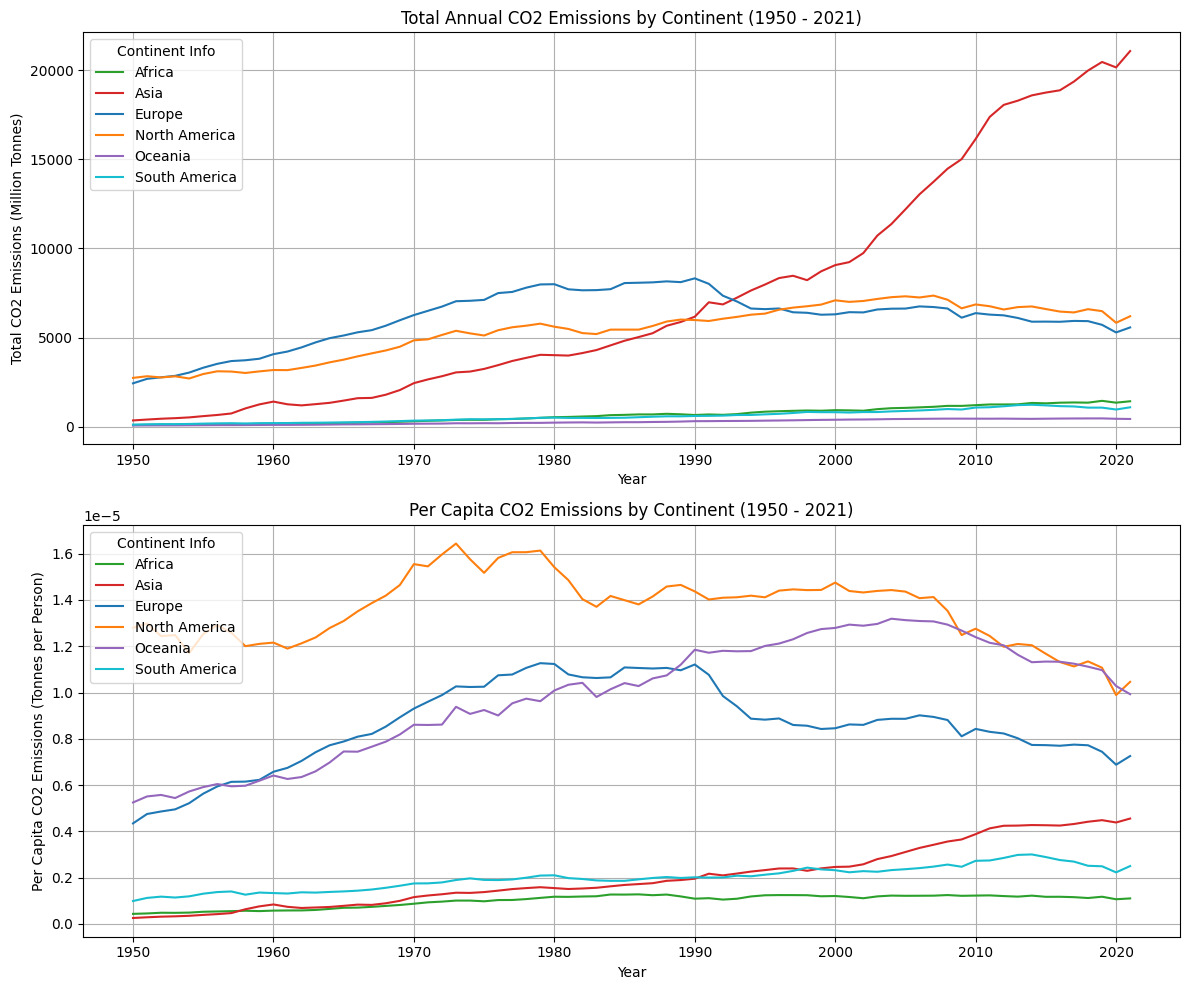

In [76]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.
# Excluding countries without iso_codes to standardise the data (this variable is being used in other parts of the code)
missing_iso_entries_dropped = df.dropna(subset=['iso_code'])
# Filtering the dataset from 1950 to 2021
filtered_dataFrame = missing_iso_entries_dropped[(missing_iso_entries_dropped['year']>=1950) & (missing_iso_entries_dropped['year']<=2021)]
# List of countries which does not have 'iso_code' associated are dropped from records, since the naming of countries is not aligning to standardise

['Africa','Africa (GCP)','Asia','Asia (GCP)', 'Asia (excl. China and India)' 'Central America (GCP)','Europe','Europe (GCP)' 'Europe (excl. EU-27)' 'Europe (excl. EU-28)',
'European Union (27)','European Union (28)','High-income countries','International aviation' 'International shipping','International transport' 'Kosovo' 'Kuwaiti Oil Fires',
'Kuwaiti Oil Fires (GCP)','Least developed countries (Jones et al.)','Leeward Islands' 'Leeward Islands (GCP)' 'Low-income countries','Lower-middle-income countries' 'Middle East (GCP)' 'Non-OECD (GCP)',
'North America','North America (GCP)','North America (excl. USA)','OECD (GCP)' 'OECD (Jones et al.)' 'Oceania' 'Oceania (GCP)','Panama Canal Zone' 'Panama Canal Zone (GCP)' 'Ryukyu Islands','Ryukyu Islands (GCP)' 'South America' 'South America (GCP)'
,'St. Kitts-Nevis-Anguilla','St. Kitts-Nevis-Anguilla (GCP)','Upper-middle-income countries' 'World']

# Avoiding unintentional changes to the data
filtered_dataFrame = filtered_dataFrame.copy()

# Mapping available countries in the data with its belonging continent
country_to_continent = {"Afghanistan":"Asia","Albania":"Europe","Algeria":"Africa","Andorra":"Europe","Angola":"Africa","Argentina":"South America","Australia":"Oceania",
"Austria":"Europe","Azerbaijan":"Asia","Bahamas":"North America","Bahrain":"Asia","Bangladesh":"Asia",
"Barbados":"North America","Belarus":"Europe","Belgium":"Europe","Belize":"North America",
"Benin":"Africa","Bhutan":"Asia","Bolivia":"South America","Bosnia and Herzegovina":"Europe",
"Botswana":"Africa","Brazil":"South America","Brunei":"Asia","Bulgaria":"Europe","Burkina Faso":"Africa","Burundi":"Africa","Cambodia":"Asia",
"Cameroon":"Africa","Canada":"North America","Central African Republic":"Africa","Chad":"Africa","Chile":"South America","China":"Asia","Colombia":"South America",
"Comoros":"Africa","Congo":"Africa","Costa Rica":"North America","Cote d'Ivoire":"Africa","Croatia":"Europe","Cuba":"North America","Cyprus":"Europe","Czechia":"Europe",
"Denmark":"Europe","Djibouti":"Africa","Dominica":"North America","Dominican Republic":"North America","Ecuador":"South America","Egypt":"Africa","El Salvador":"North America",
"Estonia":"Europe","Eswatini":"Africa","Ethiopia":"Africa","Fiji":"Oceania","Finland":"Europe","France":"Europe","Gabon":"Africa","Gambia":"Africa","Georgia":"Europe","Germany":"Europe",
"Ghana":"Africa","Greece":"Europe","Grenada":"North America","Guatemala":"North America","Guinea":"Africa","Guinea-Bissau":"Africa","Guyana":"South America",
"Haiti":"North America","Honduras":"North America","Hungary":"Europe","Iceland":"Europe","India":"Asia","Indonesia":"Asia","Iran":"Asia","Iraq":"Asia","Ireland":"Europe",
"Israel":"Asia","Italy":"Europe","Jamaica":"North America","Japan":"Asia","Jordan":"Asia","Kazakhstan":"Europe","Kenya":"Africa","Kiribati":"Oceania","Kuwait":"Asia",
"Kyrgyzstan":"Asia","Laos":"Asia","Latvia":"Europe","Lebanon":"Asia","Lesotho":"Africa","Liberia":"Africa","Libya":"Africa","Lithuania":"Europe","Luxembourg":"Europe","Madagascar":"Africa",
"Malawi":"Africa","Malaysia":"Asia","Maldives":"Asia","Mali":"Africa","Malta":"Europe","Mauritania":"Africa","Mauritius":"Africa","Mexico":"North America","Moldova":"Europe","Monaco":"Europe",
"Mongolia":"Asia","Montenegro":"Europe","Morocco":"Africa","Mozambique":"Africa","Myanmar":"Asia","Namibia":"Africa","Nepal":"Asia","Netherlands":"Europe","New Zealand":"Oceania","Nicaragua":"North America",
"Niger":"Africa","Nigeria":"Africa","North Macedonia":"Europe","Norway":"Europe","Oman":"Asia","Pakistan":"Asia","Palau":"Oceania","Panama":"North America","Papua New Guinea":"Oceania","Paraguay":"South America",
"Peru":"South America","Philippines":"Asia","Poland":"Europe","Portugal":"Europe","Qatar":"Asia","Romania":"Europe","Russia":"Europe","Rwanda":"Africa","Saint Kitts and Nevis":"North America","Saint Lucia":"North America",
"Saint Vincent and the Grenadines":"North America","Samoa":"Oceania","San Marino":"Europe","Saudi Arabia":"Asia","Senegal":"Africa","Serbia":"Europe",
"Seychelles":"Africa","Sierra Leone":"Africa","Singapore":"Asia","Slovakia":"Europe",
"Slovenia":"Europe","Solomon Islands":"Oceania","Somalia":"Africa","South Africa":"Africa","South Korea":"Asia","South Sudan":"Africa","Spain":"Europe",
"Sri Lanka":"Asia","Sudan":"Africa","Suriname":"South America","Sweden":"Europe","Switzerland":"Europe","Syria":"Asia","Taiwan":"Asia","Tajikistan":"Asia","Tanzania":"Africa",
"Thailand":"Asia","Togo":"Africa","Tonga":"Oceania","Trinidad and Tobago":"North America","Tunisia":"Africa","Turkey":"Asia","Turkmenistan":"Asia","Tuvalu":"Oceania","Uganda":"Africa","Ukraine":"Europe",
"United Arab Emirates":"Asia","United Kingdom":"Europe","United States":"North America","Uruguay":"South America","Uzbekistan":"Asia","Vanuatu":"Oceania","Venezuela":"South America",
"Vietnam":"Asia","Yemen":"Asia","Zambia":"Africa","Zimbabwe":"Africa"}

# Defining custom colors for plotting
custom_colors = {
'Africa': '#2ca02c',
'Asia': '#d62728',
'Europe': '#1f77b4',
'North America': '#ff7f0e',
'Oceania': '#9467bd',
'South America': '#17becf'
}
# Adding a new column 'continent' to the data for mapping purpose
filtered_dataFrame.loc[:,'continent'] = filtered_dataFrame['country'].map(country_to_continent)
# Calculating the total amount of CO2 emissions per continent and per capita yearly
co2_yearly_emmission_info = filtered_dataFrame.groupby(['year','continent'])['co2'].sum().unstack()
grouped_info = filtered_dataFrame.groupby(['year','continent']).agg({'co2':'sum', 'population':'sum'})
per_capita_emissions_continent = (grouped_info['co2']/grouped_info['population']).unstack()

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
# Total CO2 emissions by continent(polt 1)
for continent_info in co2_yearly_emmission_info.columns:
# Plotting custom colors and if no mapping is found black will be the default
    axes[0].plot(co2_yearly_emmission_info.index, co2_yearly_emmission_info[continent_info], label=continent_info, color=custom_colors.get(continent_info, '#000000'))
    axes[0].set_title("Total Annual CO2 Emissions by Continent (1950 - 2021)")
    axes[0].legend(title="Continent Info")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Total CO2 Emissions (Million Tonnes)")
    axes[0].grid(True)
# Per capita CO2 emissions by continent(plot 2)
for continent_info in per_capita_emissions_continent.columns:
    axes[1].plot(per_capita_emissions_continent.index, per_capita_emissions_continent[continent_info], label=continent_info, color=custom_colors.get(continent_info, '#000000'))
    axes[1].set_title("Per Capita CO2 Emissions by Continent (1950 - 2021)")
    axes[1].legend(title="Continent Info")
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("Per Capita CO2 Emissions (Tonnes per Person)")
    axes[1].grid(True) 

plt.tight_layout()
plt.show()

# ADD YOUR ANSWER TO THE QUESTION HERE
While comparing the total CO2 emissions and per capita emissions, it is observed that different continents contribute to climate change in different ways depending on their geographical characters.

Plot 1 highlights the total CO2 emissions by each continent; it is expected that Aisa dominates the emissions by 2020 by reaching above 20000 million tonnes, which could be due to rapid industrialisation. The geographical area of Asia also plays a vital role in its CO2 emissions. South America, North America, and Africa contribute less to the carbon emissions by maintaining below 3000 million tonnes through 1950 to 2020.

Plot 2 highlights the per capita CO2 emission per person by continent. In contrast with the overall continent emission, North America seems to be on top of the chart when considered in-person emission, whereas Asia, Africa, and South America are on the lower levels.

This distinction underscores that a continent’s overall CO2 emissions differ from individual emissions, shaped by factors like cost of living, economic growth, and industrialisation.

## Q2. The share of CO2 emissions by country over time.

*Which countries have the highest CO<sub>2</sub> emissions?*

Consider the five countries with the highest total CO<sub>2</sub> emissions in 2020. Make separate plots for the years 1960, 1990 and 2020 that show the share of the total world emissions that each of these countries contributed in these years.

Consider the five European countries with the highest total CO<sub>2</sub> emissions in 2020. Make separate plots for the years 1960, 1990 and 2020 that show the share of the total European emissions that each of these countries contributed in these years.

Do the highest global producers produce a larger or smaller proportion of the total worlds emissions in 2020 compared to 1960? Do the highest European producers produce a larger or smaller proportion of the total European emissions in 2020 compared to 1960?

(Add your solution in the cells provided below.)

/var/folders/y8/cj3_j50n1bgdzj77q2cx4btr0000gn/T/ipykernel_17084/4274169283.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  european_countries_filtered_data.loc[:, 'share_of_european_emissions'] = european_countries_filtered_data.apply(lambda row:(row['co2']/european_emissions_sum.loc[row['year']]) * 100, axis=1)


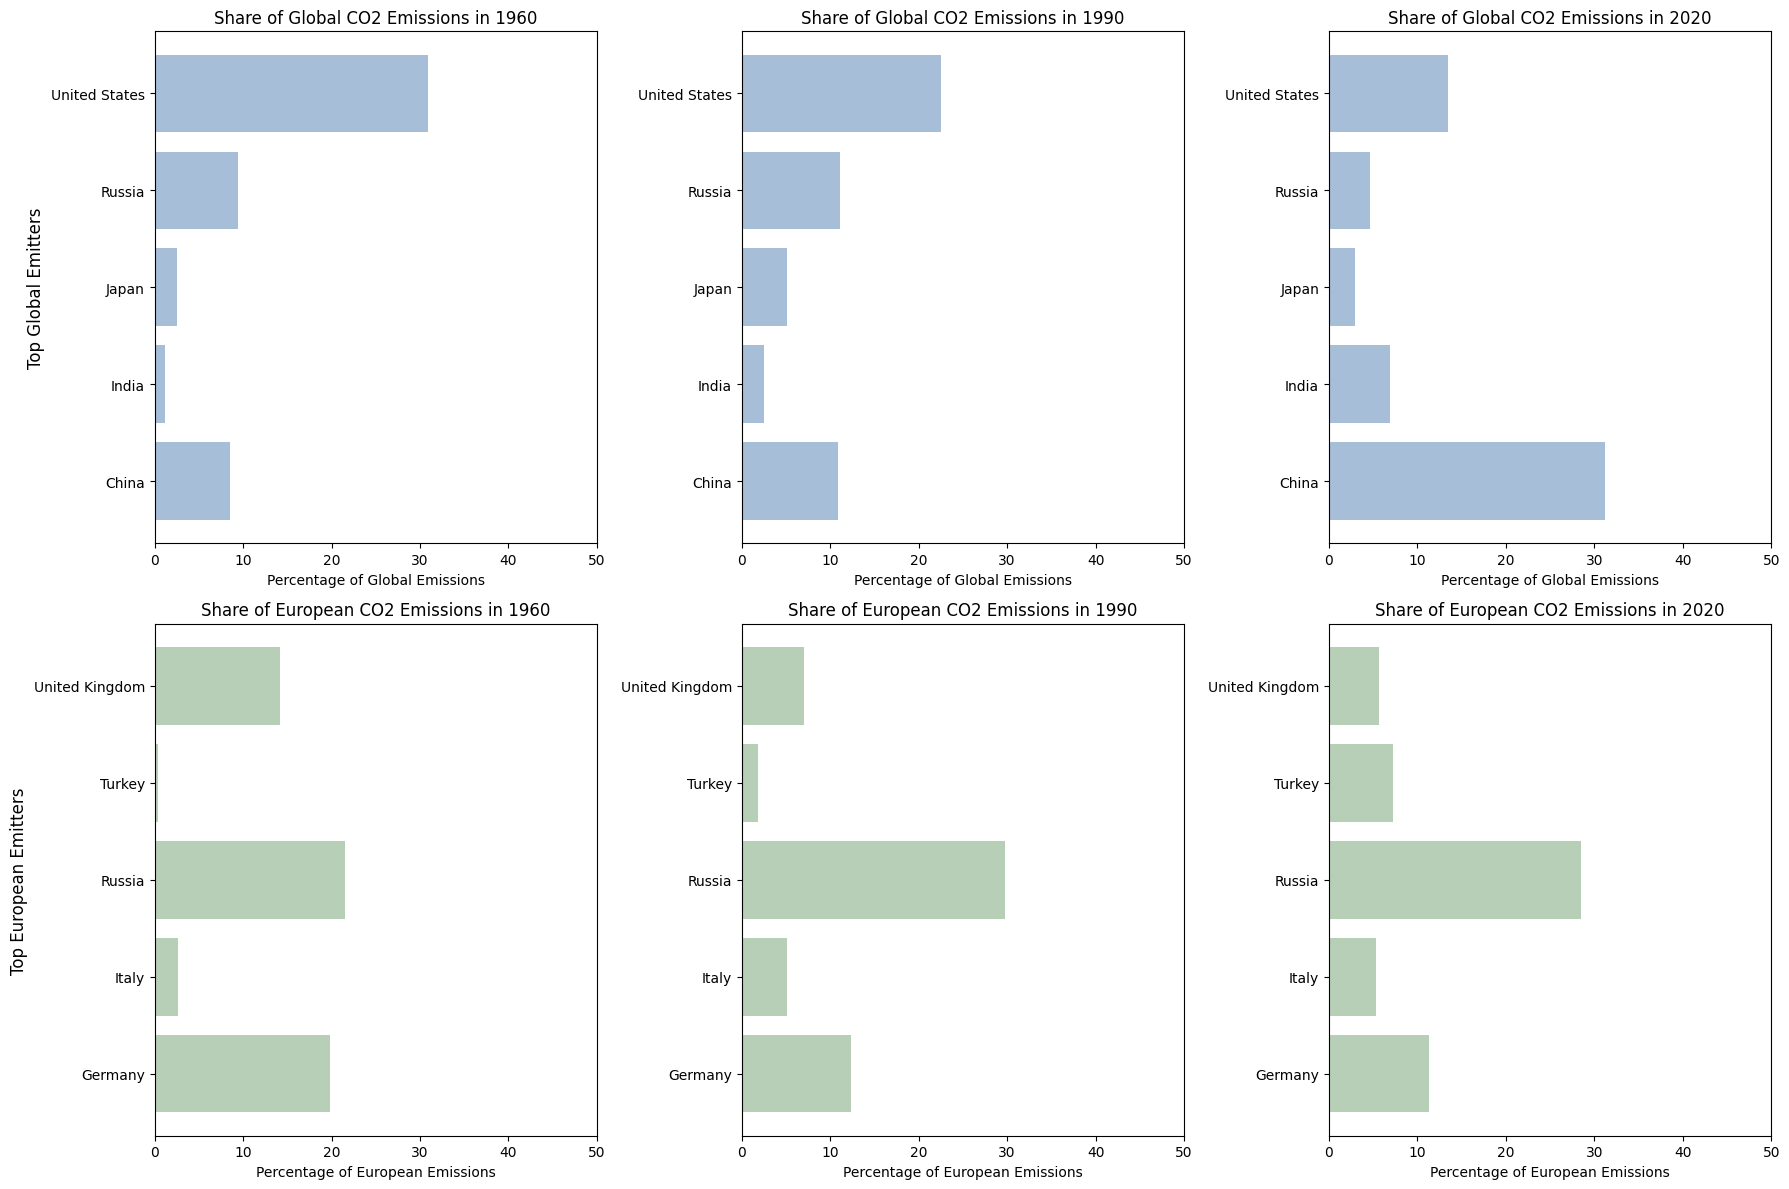

In [77]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.

# Filtering data for the year 2020 and sort by total CO2 emissions
data_of_2020_co2_emission = df[df['year']==2020]
# Excluding entries without ISO codes from the filtered data to standardise the df and considering top 5 records
data_countries_2020=data_of_2020_co2_emission.dropna(subset=['iso_code'])
top_countries_2020 = data_countries_2020[['country', 'co2']].sort_values(by='co2', ascending=False).head(5)

# Defining the years and filtering data for the selected countries and years
required_year_info=[1960, 1990, 2020]
convert_countries_to_list=top_countries_2020['country'].tolist()
data_selected=df[(df['year'].isin(required_year_info))&(df['country'].isin(convert_countries_to_list))].copy()

# Calculating total world CO2 emissions
world_co2_by_year_info=df[df['country'] == 'World'][['year','co2']].set_index('year').to_dict()['co2']
data_selected.loc[:,'share_of_global_co2']=data_selected.apply(lambda row:(row['co2']/world_co2_by_year_info[row['year']])*100, axis=1)
data_of_2020 = data_of_2020_co2_emission.copy()
# Adding a new column 'continent' by mapping the countries, country_to_continent is defined in Q1
data_of_2020.loc[:,'continent'] = data_of_2020_co2_emission['country'].map(country_to_continent)
# Considering the europe countries list as provided
european_countries_list = [
'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary',
'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
'Ukraine', 'United Kingdom', 'Vatican City'
]

top_european_emitters_2020 = missing_iso_entries_dropped[(missing_iso_entries_dropped['year'] == 2020) & (missing_iso_entries_dropped['country'].isin(european_countries_list))].sort_values(by='co2',ascending=False).head(5)['country'].unique()

# Filtering data for years: 1960, 1990, and 2020 and calculating total european emissions
european_countries_filtered_data = missing_iso_entries_dropped[(missing_iso_entries_dropped['year'].isin(required_year_info))&(missing_iso_entries_dropped['country'].isin(top_european_emitters_2020))]
european_emissions_sum = missing_iso_entries_dropped[(missing_iso_entries_dropped['year'].isin(required_year_info)) & (missing_iso_entries_dropped['country'].isin(european_countries_list))].groupby('year')['co2'].sum()
european_countries_filtered_data.loc[:, 'share_of_european_emissions'] = european_countries_filtered_data.apply(lambda row:(row['co2']/european_emissions_sum.loc[row['year']]) * 100, axis=1)
# Combined plot for Global and European CO2 emissions of top 5 countries
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharey=False)

# Plot for Global emissions
for i, year in enumerate(required_year_info):
    year_data_global = data_selected[data_selected['year'] == year]
    # Plotting horizontal bars
    axes[0,i].barh(year_data_global['country'],year_data_global['share_of_global_co2'],color='#A7BED9')
    axes[0,i].set_title(f'Share of Global CO2 Emissions in {year}')
    axes[0,i].set_xlabel('Percentage of Global Emissions')
    axes[0,i].set_xlim(0, 50)
# Plot for European emissions
for i, year in enumerate(required_year_info):
    year_infor_europe = european_countries_filtered_data[european_countries_filtered_data['year']== year]
    axes[1,i].barh(year_infor_europe['country'], year_infor_europe['share_of_european_emissions'],color='#B6CFB6')
    axes[1,i].set_title(f'Share of European CO2 Emissions in {year}')
    axes[1,i].set_xlabel('Percentage of European Emissions')
    axes[1,i].set_xlim(0, 50)

# Setting general titles for rows
axes[0,0].set_ylabel('Top Global Emitters',fontsize=12)
axes[1,0].set_ylabel('Top European Emitters',fontsize=12)

plt.tight_layout()
plt.show()

# ADD YOUR ANSWER TO THE QUESTION HERE
After analysing the top five countries globally with the highest emissions in 2020 and comparing them with 1960 and 1990, the CO2 emissions of the United States show a drastic decrease in emissions when compared with 1960 to 2020. On the other side, a dramatic increase is noted in the China's CO2 emission data between 1990 and 2020. The other top countries contributing to emissions are Russia, Japan, and India.

For the Europe region, Russia, Germany, the United Kingdom, Italy, and Turkey were identified as the top emitters in 2020. The emission percentage of Russian seems to be increasing from 1960 to 2020, making it the top contributor in all three years. Geramny and the United Kingdom have managed to reduce their emissions across the years.

Comparing 1960 to 2020, interestingly, the highest global emitters have genuinely increased their share of total emissions, which accelerated industrial growth and population increases, while European emitters exhibited a decreasing trend, reflecting the policy shift toward cleaner energy sources.

## Q3. The link between GDP and CO<sub>2</sub> emissions

*Do countries with high GDP always have high per capita CO<sub>2</sub> emissions.* 

Plot the per capita CO<sub>2</sub> emissions against the GDP per capita for each country, adjusting the area of each marker to represent the population of the country. Only include countries with a population of at leat 10 million people in 2018. Annotate significant countries on the plot, such as large countries or outliers.

Compare these plots for the year 1978, 1998 and 2018. Comment on any patterns in the relationship between GDP per capita and CO₂ emissions per capita and how they may have changed over time.

(Add your solution in the cells provided below.)

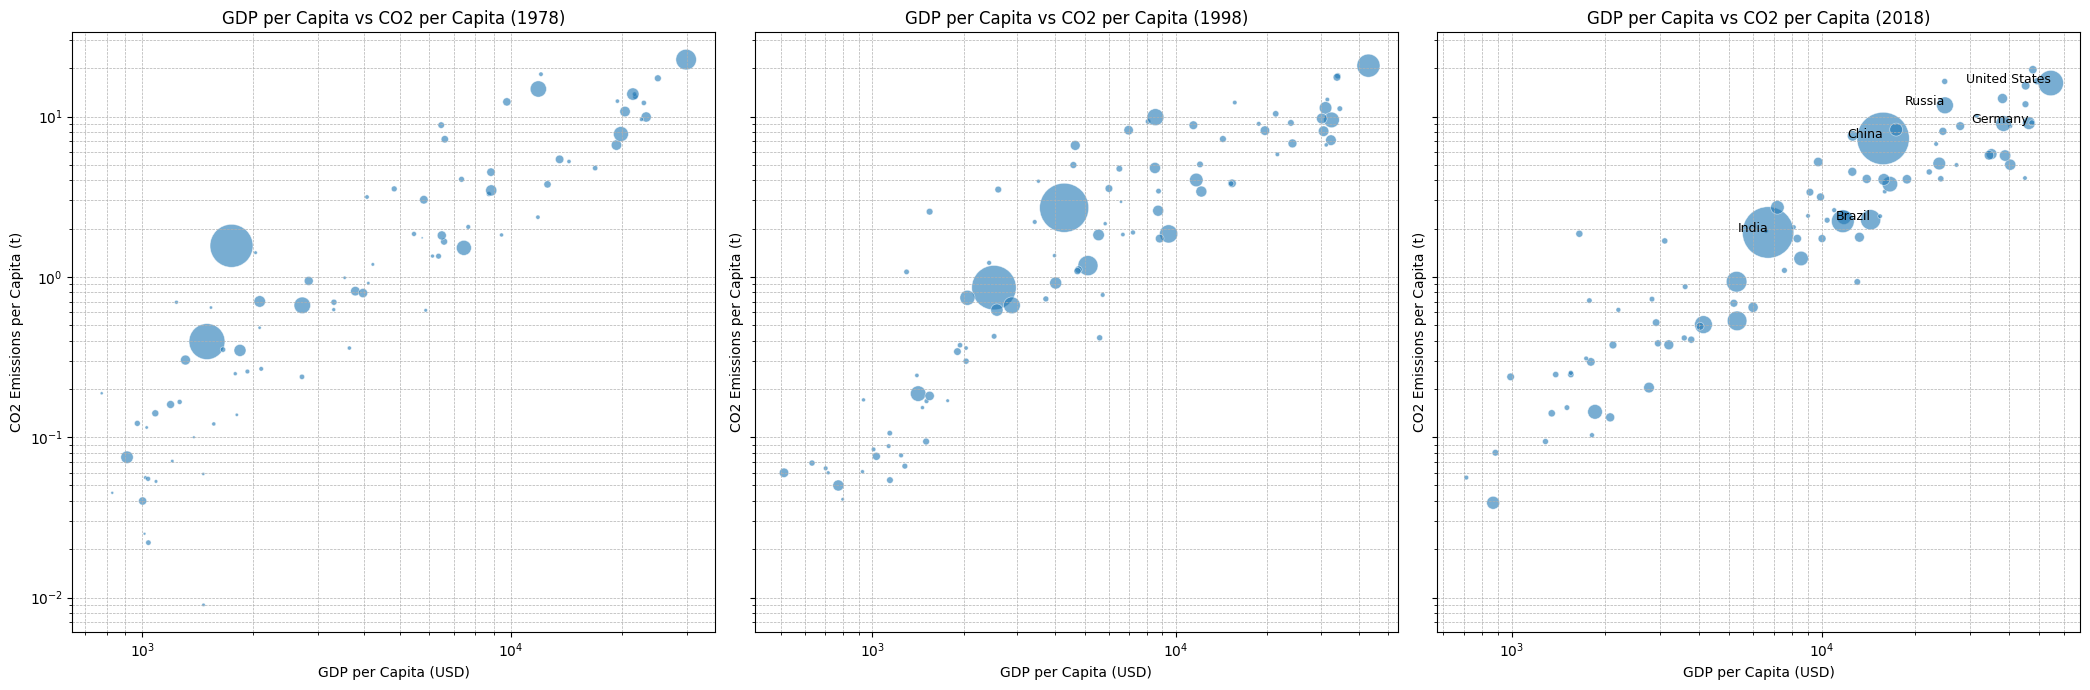

In [78]:
# # ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.

# Defining required variables and filtering data
years = [1978, 1998, 2018]
population_threshold = 10000000

# Filtering the data for 2018 to apply population threshold (missing_iso_entries_dropped is defined in Q1 which excludes iso_code missing records)
population_threshold_countries_info = missing_iso_entries_dropped[(missing_iso_entries_dropped['year'] == 2018) & (missing_iso_entries_dropped['population'] >= population_threshold)]['country'].unique()

# Filtering the data for the selected years and large population countries
filtered_data = missing_iso_entries_dropped[(missing_iso_entries_dropped['year'].isin(years)) & (missing_iso_entries_dropped['country'].isin(population_threshold_countries_info))]
filtered_data = filtered_data[(filtered_data['population'] > 0) & (filtered_data['gdp'] > 0)]
filtered_data['gdp_per_capita'] = filtered_data['gdp'] / filtered_data['population']

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)
for i, year in enumerate(years):
    year_data = filtered_data[filtered_data['year'] == year]
    scatter = axes[i].scatter(year_data['gdp_per_capita'], year_data['co2_per_capita'], 
    s=year_data['population'] / 1e6, # To adjust marker size for population 1e6 represents 10^6
    alpha=0.6, edgecolors='w', linewidth=0.5)
    axes[i].set_title(f'GDP per Capita vs CO2 per Capita ({year})')
    axes[i].set_xlabel('GDP per Capita (USD)')
    axes[i].set_ylabel('CO2 Emissions per Capita (t)')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)

# Considering list of significant countries to display labels
significant_countries = ['China', 'United States', 'India', 'Russia', 'Brazil', 'Germany']
for index, row in year_data.iterrows():
    if row['country'] in significant_countries:
        axes[i].annotate(row['country'], (row['gdp_per_capita'],row['co2_per_capita']),fontsize=9,ha='right')

plt.tight_layout()
plt.show()

# ADD YOUR ANSWER TO THE QUESTION HERE
The above plot renders the information of countries with more than 10 million people. The relationship between the GDP per capita and CO2 emissions per capita can be observed over the years 1978, 1998, and 2018. It is evident that GDP per capita is strongly associated with greater CO2 emission per capita in 1978, particularly for stronger economies like the US and Germany. On the other hand, developing nations such as India and Brazil displayed low values for both indicators.

This pattern is changed by 1998. China and other rapidly industrialising nations started to show rising CO2 levels and GDP per capita.

Major changes emerged in 2018. With gains in GDP per capita and emissions per capita, China became a notable. Nations such as the US and Germany have shown efforts to restrain the growth of emissions in relation to economic output. A decrease in CO2 emissions is clearly observed during the course, which in turn refelects the contributions and considerations toward the climatic changes.


## Q4. The development of wealth inequality over time.

*How has wealth and wealth inequality developed over time?*

Make a plot that shows the distribution of GDP per capita across countries at each decade from 1950 to 2020 (i.e., at the years 1950, 1960, 1970, etc.). Only include countries with a population of at least 5 million in 2020.

The World Bank defines an income of less than $2.15 per day as extreme poverty, corresponding to an annual GDP per capita of $785. Mark this threshold on your plots. For each year shown, calculate the number of people living in countries with a GDP per capita below this level and annotate this in your figure. Comment on whether this population has grown or shrunk as a proportion of the world’s total population over time.

(Add your solution in the cells provided below.)

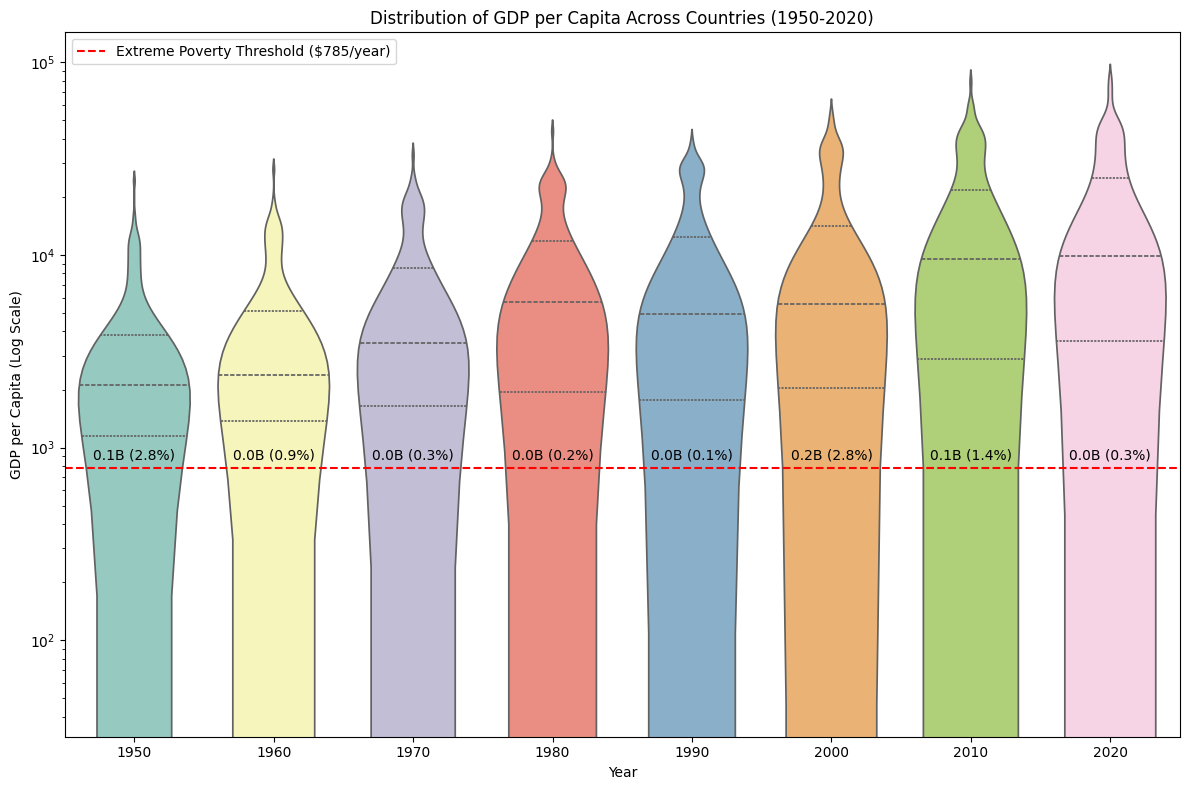

In [79]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.

# Filtering the data for 2020 and countries with population greater that 5 million (missing_iso_entries_dropped is defined in Q1 which excludes iso_code missing records)
data_filter_2020 = missing_iso_entries_dropped[(missing_iso_entries_dropped['year'] == 2020) & (missing_iso_entries_dropped['population'] >= 5000000)]
country_list_2020 = data_filter_2020['iso_code'].unique()

# Filtering every decade from 1950 to 2020 (missing_iso_entries_dropped is defined in Q1 which excludes iso_code missing records)
decade_years = list(range(1950, 2030, 10))
filtered_decade_data = missing_iso_entries_dropped[(missing_iso_entries_dropped['year'].isin(decade_years)) & (missing_iso_entries_dropped['iso_code'].isin(country_list_2020))].dropna(subset=['gdp', 'population'])

# Calculating gdp_per_capita and setting required paramaters for plotting violinplot
filtered_decade_data['gdp_per_capita'] = filtered_decade_data['gdp'] / filtered_decade_data['population']
threshold_gdp = 785 
plt.figure(figsize=(12, 8))
sns.violinplot( data=filtered_decade_data, x='year',
y='gdp_per_capita', inner='quartile', hue='year', density_norm='width',palette='Set3',
legend=False
)
plt.axhline(y=threshold_gdp,color='r',linestyle='--',label='Extreme Poverty Threshold ($785/year)')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (Log Scale)')
plt.title('Distribution of GDP per Capita Across Countries (1950-2020)')
plt.legend()

# Calculating and annotating the number of people living below the threshold
for year in decade_years:
    year_data = filtered_decade_data[filtered_decade_data['year'] == year]
    population_below_poverty = year_data[year_data['gdp_per_capita']<threshold_gdp]['population'].sum()
    total_population = year_data['population'].sum()
    percentage_below_poverty = (population_below_poverty / total_population) * 100
    plt.text(x=decade_years.index(year), y=threshold_gdp * 1.1,s=f"{population_below_poverty / 1e9:.1f}B ({percentage_below_poverty:.1f}%)", # 1e9 is 1billion or 10^9
    horizontalalignment='center'
    )

plt.tight_layout()
plt.show()

# ADD YOUR ANSWER TO THE QUESTION HERE
The GDP per capita of the nations with populations over 5 million between 1950 and 2020 is shown in the violin plot above. 
Given that the World Bank defined extreme poverty as having an annual GDP per capita of less than $785, the number of people living below this threshold was substantial, indicating a significant degree of poverty. Nonetheless, the majority of nations have seen economic development, which has caused the GDP per capita distribution to gradually increase.

The proportion of people living below the extreme poverty threshold decreased by 2020. Numerous factors, such as increased international trade, industrial growth, and economic changes, might be attributed to this decline. However, the violin graphs show that inequality persists and that some countries continue to lag economically.

## Before submitting

If you have used print statements for debugging purposes, please make sure that you remove them before submitting your notebook. When the submitted notebook runs it should only generate the plots and no additional output.

Double check that your notebook runs correctly when cells are run in order from the beginning. You can do this by selecting "Restart and run all" from the Kernel menu. 

Make sure that you save your notebook using the name `COM6018-assignment1-<your-student-username>.ipynb`. For example, if your username is 'ac1jpb' then your notebook should be named `COM6018-assignment1-ac1jpb.ipynb`. 

To submit, follow the instruction in the accompanying assignment instructions document. For late submission, unless there are extenuating circumstances, standard lateness penalties will be applied.